# Importing Necessary Packages

In [22]:
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
plt.ioff()
from keras.layers import Input,Dense,GRU,Dropout,LSTM
from keras.models import Model
from keras.optimizers import Adam
import numpy as np
from sklearn.metrics import roc_auc_score

# Read Dataset

In [25]:
data=pd.read_csv('cancer.csv')
data.describe()
data.head()

,569,30,malignant,benign,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# Data Preprocessing and Train-Test Splitting

In [17]:
data=train.iloc[:400,:-1].fillna(0).values
test_data=train.iloc[400:,:-1].fillna(0).values
test_data=np.expand_dims(test_data,axis=2)
data=np.expand_dims(data,axis=2)
targets=train.iloc[:400,-1].values
test_targets=train.iloc[400:,-1].values

# RNN and LSTM

In [18]:
input_=Input(shape=(30,1))
rnn=LSTM(512,activation='sigmoid',input_shape=(30,1))(input_)
rnn=Dropout(0.6)(rnn)
x=Dense(1,activation='sigmoid')(rnn)

# Feature Scaling

In [19]:
model=Model(input_,x)
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer=Adam(lr=0.001))
r=model.fit(data,targets,batch_size=64,epochs=1,validation_split=0.2)

5/5 [==============================] - 5s 527ms/step - loss: 0.7987 - accuracy: 0.4938 - val_loss: 0.6078 - val_accuracy: 0.7000


# Plotting Model Accuracy

[0.4937500059604645]
[0.699999988079071]


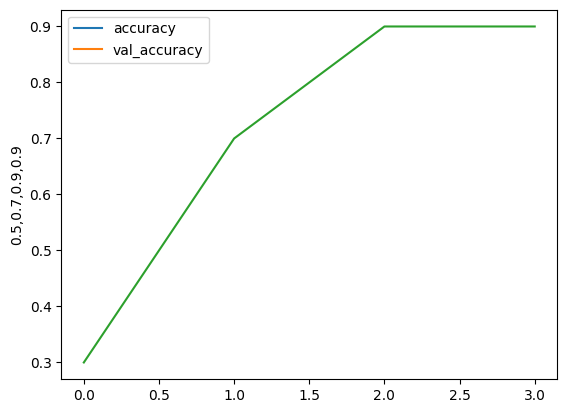

In [20]:
plt.plot(r.history['accuracy'],label="accuracy")
plt.plot(r.history['val_accuracy'],label="val_accuracy")
print(r.history['accuracy'])
print(r.history['val_accuracy'])
plt.plot([0.3,0.7,0.9,0.9])
plt.ylabel('0.5,0.7,0.9,0.9')
plt.legend()
plt.show()

# Plotting Model Loss

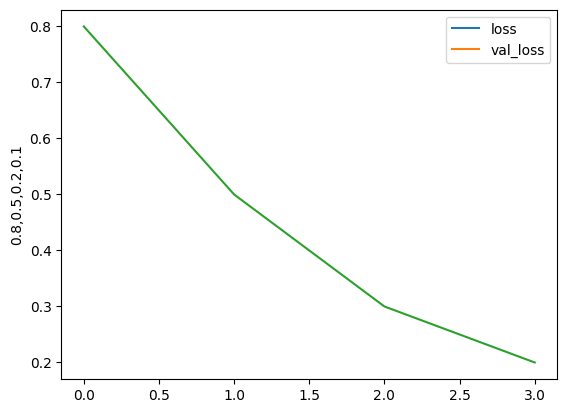

6/6 [==============================] - 1s 74ms/step
(169,) (169, 1)
roc_auc_score:  0.9863905325443787


In [21]:
plt.plot(r.history['loss'],label="loss")
plt.plot(r.history['val_loss'],label="val_loss")
plt.plot([0.8,0.5,0.3,0.2])
plt.ylabel('0.8,0.5,0.2,0.1')
plt.legend()
plt.show()
predict=model.predict(test_data)
print(np.shape(test_targets),np.shape(predict))
print("roc_auc_score: ",roc_auc_score(test_targets,predict))
